<a href="https://colab.research.google.com/github/MekhzZ/Learning_path_Data_Analyst/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/500_Person_Gender_Height_Weight_Index.csv')

In [3]:
df.shape

(500, 4)

In [4]:
df.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


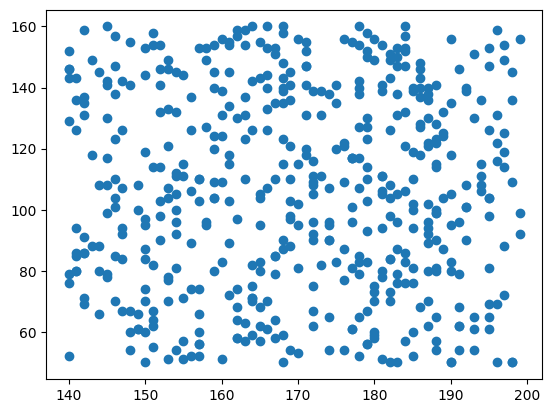

In [31]:
plt.scatter(df.Height, df.Weight)

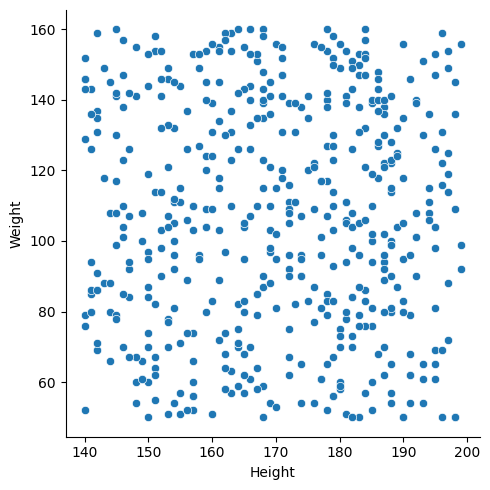

In [6]:
#scatter plot

sns.relplot(x='Height', y='Weight', data=df)

In [13]:
#lineplot

x = np.random.rand(5)
y= 5 + np.random.rand(5)*x

x,y

(array([0.79216758, 0.70292527, 0.7237591 , 0.13154224, 0.77598292]),
 array([5.04337131, 5.28507113, 5.25491869, 5.0088523 , 5.38544006]))

<Axes: xlabel='x', ylabel='y'>

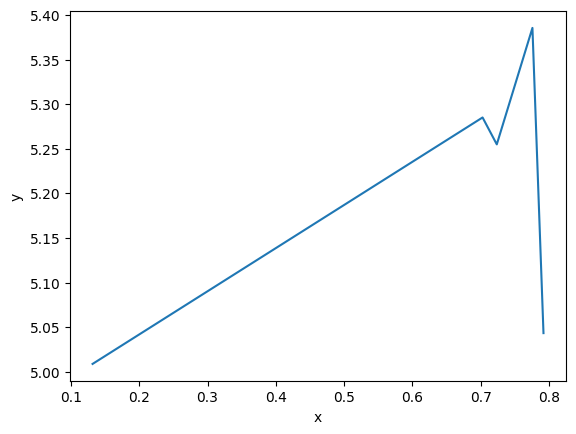

In [14]:

x_y = pd.DataFrame({'x':x, 'y':y})
sns.lineplot(x='x', y='y', data=x_y)

In [15]:
#bar charts

index_counts = df.groupby(['Index']).size().reset_index()
index_counts.columns = ['Index', 'Count']
index_counts

,Index,Count
0,0,13
1,1,22
2,2,69
3,3,68
4,4,130
5,5,198


<Axes: xlabel='Index', ylabel='Count'>

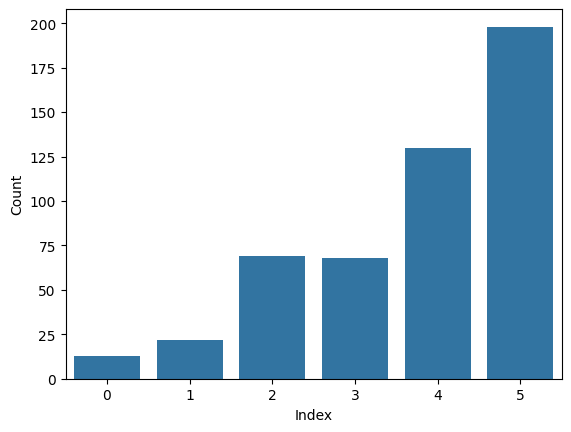

In [16]:
sns.barplot(x='Index', y='Count', data=index_counts)

In [17]:
#stacked bar chart

index_gender_counts = df.groupby(['Index', 'Gender']).size().reset_index()
index_gender_counts.columns = ['Index', 'Gender', 'Count']
index_gender_counts

,Index,Gender,Count
0,0,Female,7
1,0,Male,6
2,1,Female,7
3,1,Male,15
4,2,Female,41
5,2,Male,28
6,3,Female,36
7,3,Male,32
8,4,Female,71
9,4,Male,59


<Axes: xlabel='Index'>

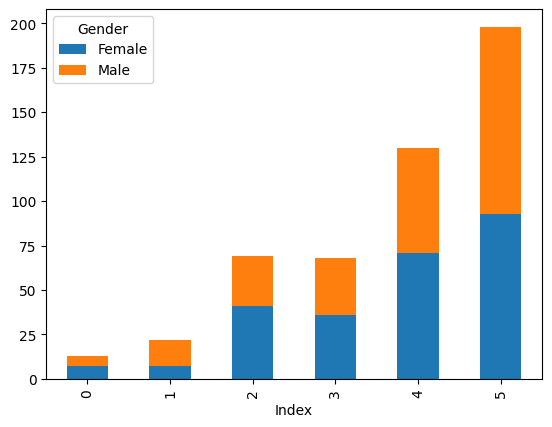

In [18]:
index_gender_counts.set_index('Index').pivot(columns='Gender', values='Count').plot(kind='bar', stacked=True)

<Axes: xlabel='Index', ylabel='Count'>

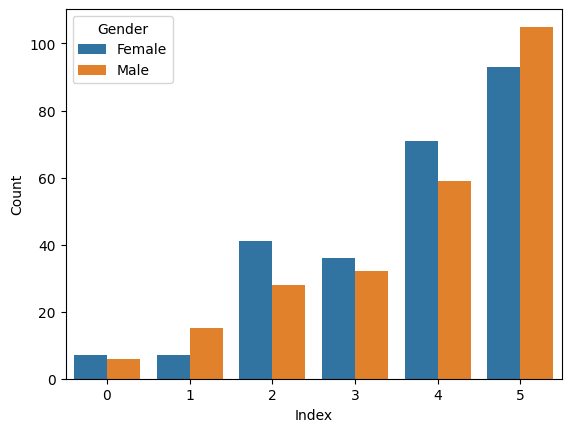

In [19]:
#column bar chart

sns.barplot(x='Index', y='Count', hue='Gender', data=index_gender_counts)

<Axes: xlabel='Height', ylabel='Count'>

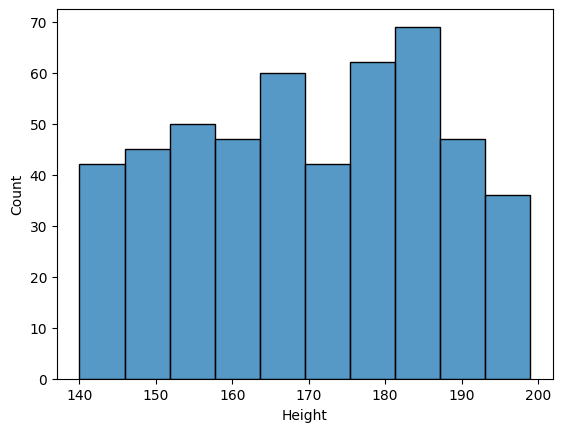

In [21]:
#histogram

sns.histplot(df.Height)

<Axes: xlabel='Height', ylabel='Density'>

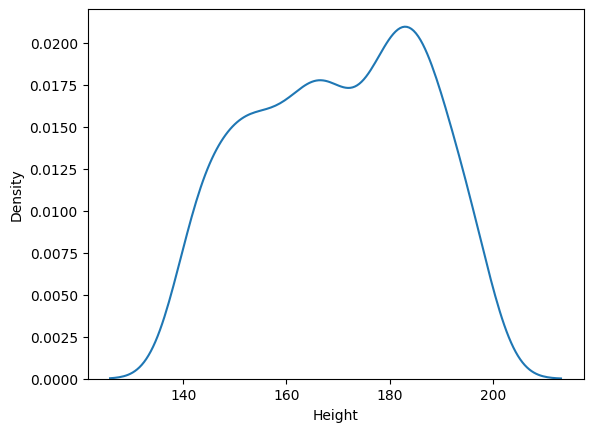

In [23]:
#kde plot

sns.kdeplot(data = df, x='Height')

<Axes: xlabel='Index', ylabel='Height'>

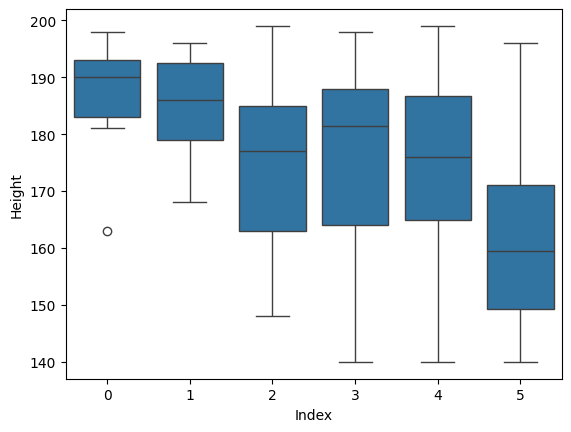

In [26]:
#boxplot

sns.boxplot(x='Index', y='Height', data=df)

**Multiple plots**

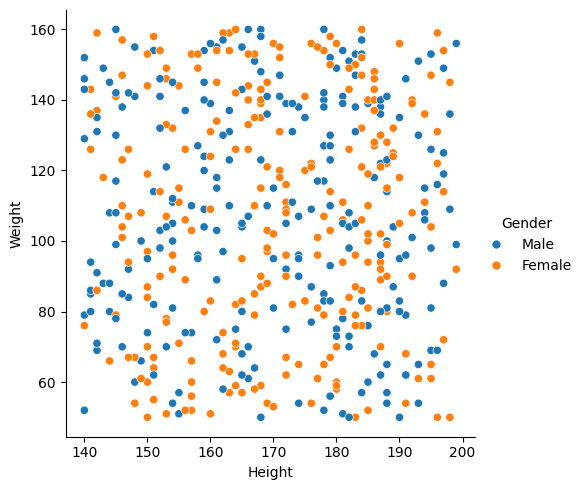

In [27]:
#scatter plots : height vs weight by gender

sns.relplot(x='Height', y='Weight', hue='Gender', data=df)

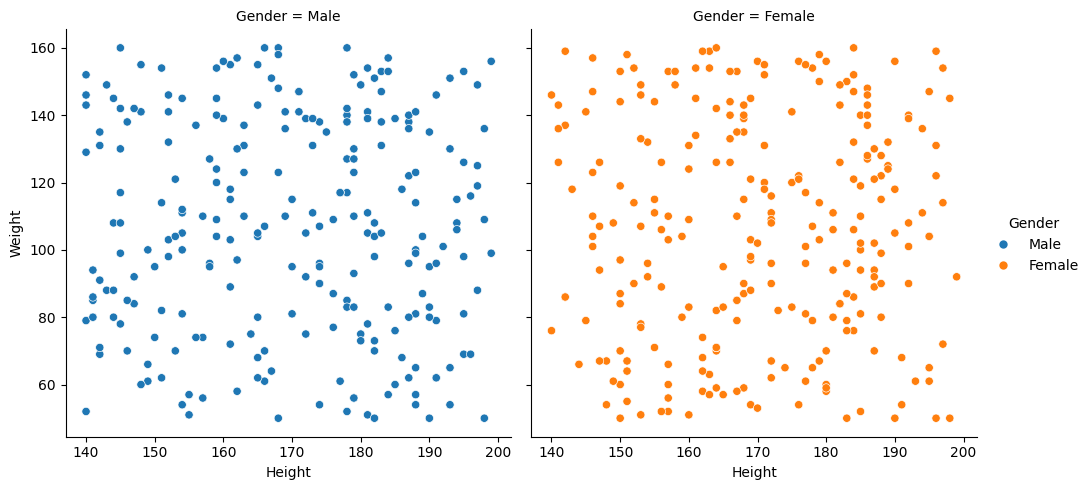

In [28]:
sns.relplot(x='Height', y='Weight', hue='Gender', data=df, col='Gender')

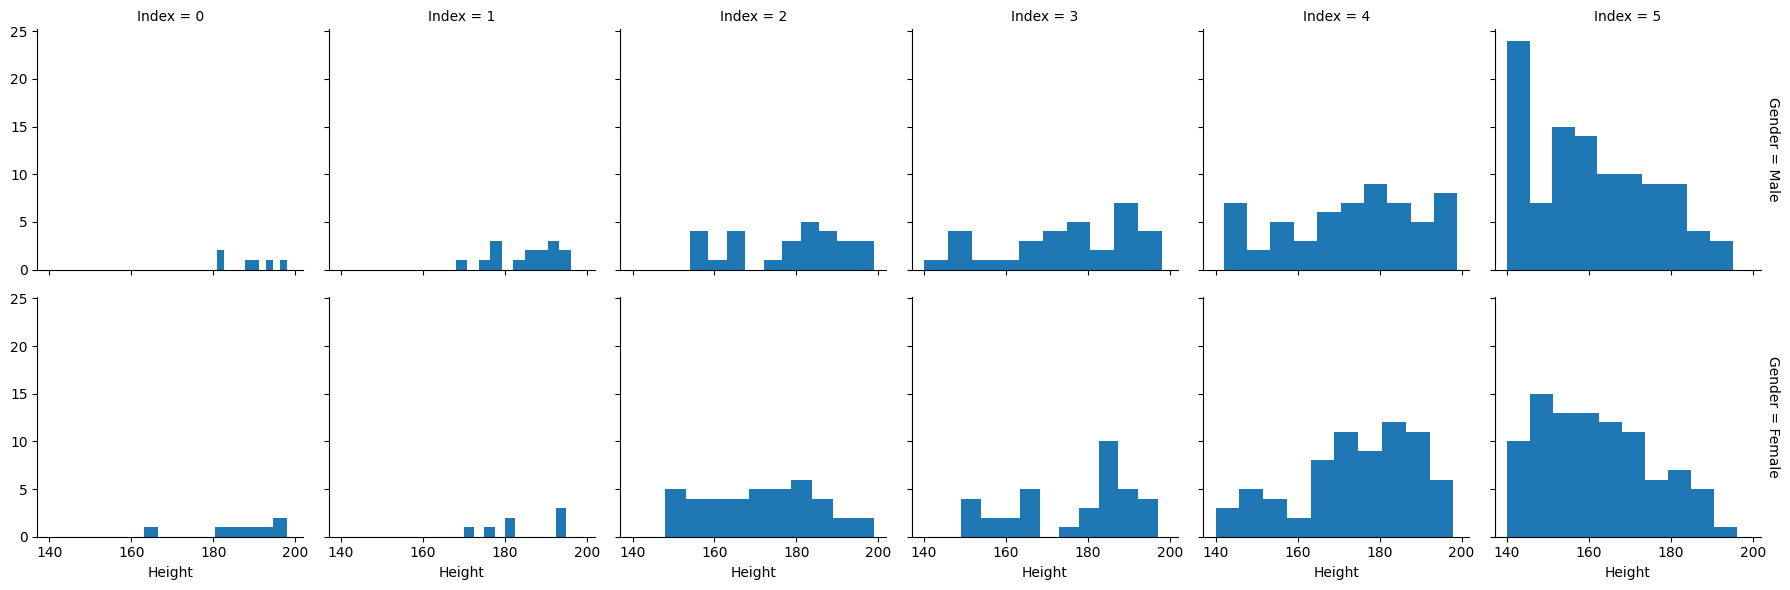

In [30]:
#visualizing data by two categories

grid = sns.FacetGrid(data = df, col = 'Index', row='Gender', margin_titles=True)
grid.map(plt.hist, 'Height')

top row indicates the Index falls under Male wrt Height